In [380]:
import matplotlib.pyplot as plt
import numpy as np

Parâmetros de entrada

In [381]:
Af = 1.26 # m^2
Cd = 0.76
Rd = 0.2667 # m
Cr = 0.1
Tm = 26.5 # Nm
m = 237.6 # kg
ef = 0.94
icvtmax = 4.74
icvtmin = 0.82
icx = 7.1
Vel = 10 # km/h
p = 1.225 # kg/m^3
g = 9.81 # m/s^2
deg = 45
grad = np.tan((deg*np.pi)/180)

In [382]:
# Força resistência aerodinâmica
def Fa(v):
    return 0.5 * Af * Cd * p * (v/3.6)**2

# Força resistência ao rolamento
def Fr(theta):
    return Cr * m * g * np.cos((theta * np.pi) / 180)

# Força tração nas rodas
def Ft(Tm, icvt, ef):
    return (Tm * ef * icvt * icx) / (Rd)

# Resistência ao aclive
def Fac(theta):
    return m * g * np.sin((theta * np.pi) / 180)

# Resultante das forças
def F(v, theta, Tm, icvt, ef):
    return Ft(Tm, icvt, ef) - Fa(v) - Fr(theta) - Fac(theta)

# Aceleração
def a(v, theta, Tm, icvt, ef, m):
    return F(v, theta, Tm, icvt, ef) / m

# Velocidade final
def Vf(Rd, icvt, icx, ef):
    return ((0.377 * 3600 * Rd)/(icvtmin * icx))*ef

## Distância percorrida
# def S(v, theta, Tm, icvt, ef, m):
#     return (v**2)/(2*a(v, theta, Tm, icvt, ef, m))

# Tempo para rodar 30 metros
def t30(v, theta, Tm, icvt, ef, m):
    return (2*30)/(np.sqrt(v**2 + 2*a(v, theta, Tm, icvt, ef, m)*30))


print(f'Velocidade máxima da roda em função do RPM do motor ({3600}RPM): {Vf(Rd, icvtmin, icx, ef):.2f}km/h')
print(f'Força tração ({2500}RPM): {Ft(Tm, icvtmin, ef):.2f}N')
print(f'Força tração ({2000}RPM): {Ft(24.5, icvtmax, ef):.2f}N')
print(f'Força resistência aerodinâmica ({Vel}km/h): {Fa(Vel):.2f}N')
print(f'Força resistência ao rolamento ({grad*100:.2f}% | {deg}º): {Fr(deg):.2f}N')
print(f'Força resistência ao aclive ({grad*100:.2f}% | {deg}º): {Fac(deg):.2f}N')
print(f'Tempo para percorrer 30 metros ({0*100:.2f}% | {0}º): {t30(Vel, 0, Tm, icvtmin, ef, m):.2f}s')
# print(f'Aclive máximo partindo de {Vf(Rd, icvtmin, icx, ef):.2f}km/h: {np.arctan(Ft(Tm, icvtmin, ef)/(m*g))*180/np.pi:.2f}º')
print(f'Aclive máximo partindo de 0km/h: {np.tan(((np.arctan(Ft(Tm, icvtmax, ef)/(m*g))*180/np.pi)*np.pi)/180)*100:.2f}% | {np.arctan(Ft(Tm, icvtmax, ef)/(m*g))*180/np.pi:.2f}º')
print(f'Força resistência ao aclive ({np.tan(((np.arctan(Ft(Tm, icvtmax, ef)/(m*g))*180/np.pi)*np.pi)/180)*100:.2f}% | {np.arctan(Ft(Tm, icvtmax, ef)/(m*g))*180/np.pi:.2f}º): {Fac(np.arctan(Ft(Tm, icvtmax, ef)/(m*g))*180/np.pi):.2f}N')

# s = S(Vf(Rd, icvtmin, icx, ef), deg, Tm, icvtmin, ef, m)
# print(f'Distância percorrida: {s:.2f}m')


Velocidade máxima da roda em função do RPM do motor (3600RPM): 58.44km/h
Força tração (2500RPM): 543.78N
Força tração (2000RPM): 2906.08N
Força resistência aerodinâmica (10km/h): 4.53N
Força resistência ao rolamento (100.00% | 45º): 164.82N
Força resistência ao aclive (100.00% | 45º): 1648.16N
Tempo para percorrer 30 metros (0.00% | 0º): 4.51s
Aclive máximo partindo de 0km/h: 134.86% | 53.44º
Força resistência ao aclive (134.86% | 53.44º): 1872.27N


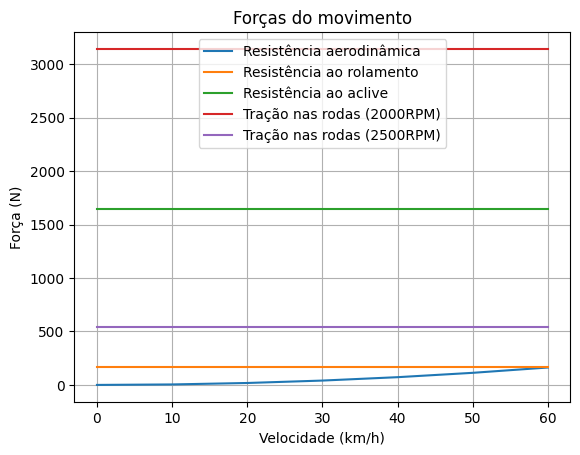

In [383]:
plt.plot([0, 10, 20, 30, 40, 50, 60], [Fa(0), Fa(10), Fa(20), Fa(30), Fa(40), Fa(50), Fa(60)], label='Resistência aerodinâmica')
plt.plot([0, 10, 20, 30, 40, 50, 60], [Fr(deg), Fr(deg), Fr(deg), Fr(deg), Fr(deg), Fr(deg), Fr(deg)], label='Resistência ao rolamento')
plt.plot([0, 10, 20, 30, 40, 50, 60], [Fac(deg), Fac(deg), Fac(deg), Fac(deg), Fac(deg), Fac(deg), Fac(deg)], label='Resistência ao aclive')
plt.plot([0, 10, 20, 30, 40, 50, 60], [Ft(Tm, icvtmax, ef), Ft(Tm, icvtmax, ef),Ft(Tm, icvtmax, ef),Ft(Tm, icvtmax, ef),Ft(Tm, icvtmax, ef),Ft(Tm, icvtmax, ef),Ft(Tm, icvtmax, ef)], label='Tração nas rodas (2000RPM)')
plt.plot([0, 10, 20, 30, 40, 50, 60], [Ft(Tm, icvtmin, ef), Ft(Tm, icvtmin, ef),Ft(Tm, icvtmin, ef),Ft(Tm, icvtmin, ef),Ft(Tm, icvtmin, ef),Ft(Tm, icvtmin, ef),Ft(Tm, icvtmin, ef)], label='Tração nas rodas (2500RPM)')
# plt.plot([0, 10, 20, 30, 40, 50, 60], [F(0, deg, Tm, icvtmax, ef), F(10, deg, Tm, icvtmax, ef), F(20, deg, Tm, icvtmax, ef), F(30, deg, Tm, icvtmax, ef), F(40, deg, Tm, icvtmax, ef), F(50, deg, Tm, icvtmax, ef), F(60, deg, Tm, icvtmax, ef)], label='Resultante das forças')
plt.title('Forças do movimento')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Força (N)')
plt.legend()
plt.grid()
plt.show()

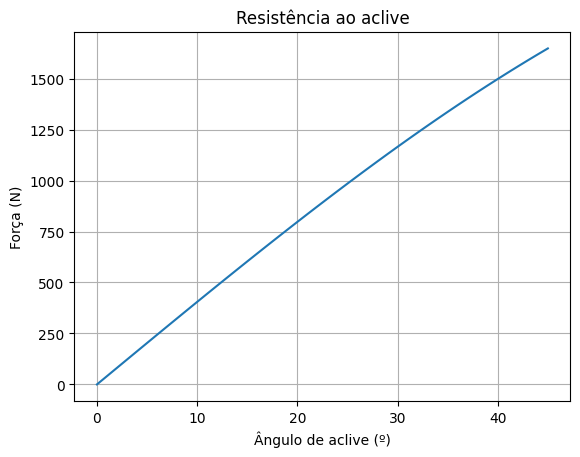

In [384]:
aclives = np.linspace(0, 45, 46)

plt.plot(aclives, [Fac(aclive) for aclive in aclives])
plt.title('Resistência ao aclive')
plt.xlabel('Ângulo de aclive (º)')
plt.ylabel('Força (N)')
plt.grid()
plt.show()